# opencv course
# A presentation by Mohammad Kahkeshani
### instagram:
#### codevision_academy
#### kahkeshani_mohammad

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

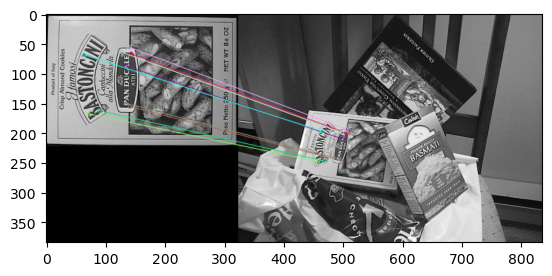

In [2]:
img1 = cv2.imread('images/box.png',0)          # queryImage
img2 = cv2.imread('images/box_in_scene.png',0) # trainImage

# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show();

### Use KNN

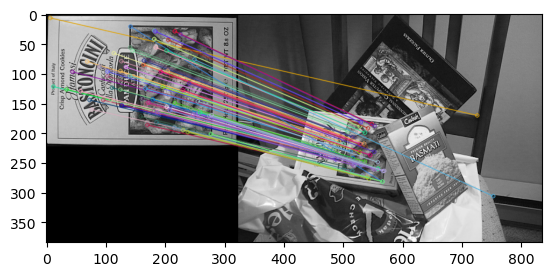

(<matplotlib.image.AxesImage at 0x1c51c3f7550>, None)

In [3]:
img1 = cv2.imread('images/box.png', 0)          # queryImage
img2 = cv2.imread('images/box_in_scene.png', 0) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()

matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

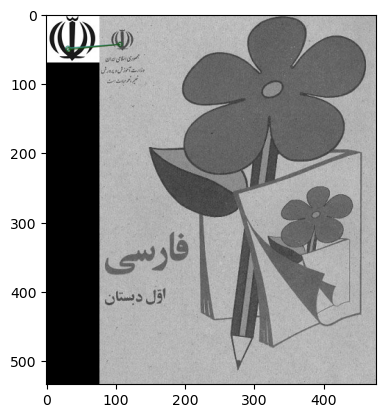

(<matplotlib.image.AxesImage at 0x1c52bf85f10>, None)

In [4]:
img1 = cv2.imread('images/arm.jpg', 0)          # queryImage
img2 = cv2.imread('images/ketab.jpg', 0) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()

matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

### Money Detection

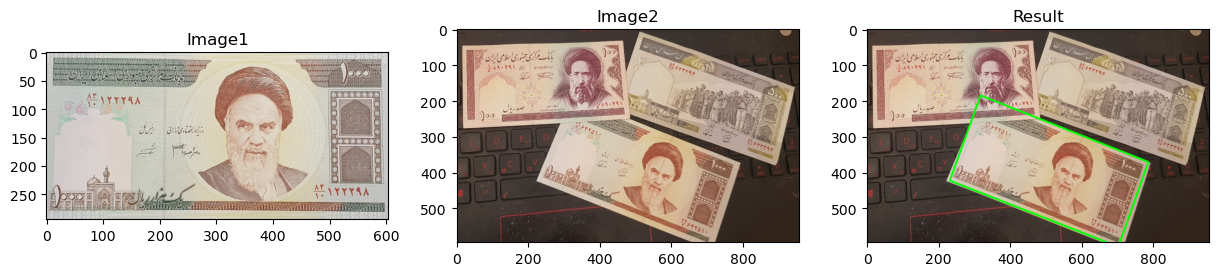

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('images/100tomani.jpg', cv2.IMREAD_GRAYSCALE)
img2_color = cv2.imread('images/eskenas.jpg')
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)
good = [m for m, n in matches if m.distance < 0.7 * n.distance]

result = img2_color.copy()
if good:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    h, w = img1.shape
    dst = cv2.perspectiveTransform(np.float32([[0,0],[0,h-1],[w-1,h-1],[w-1,0]]).reshape(-1,1,2), M)
    result = cv2.polylines(result, [np.int32(dst)], True, (0,255,0), 3, cv2.LINE_AA)

plt.figure(figsize=[15,4])
plt.subplot(131); plt.imshow(cv2.cvtColor(cv2.imread('images/100tomani.jpg'), cv2.COLOR_BGR2RGB)); plt.title('Image1')
plt.subplot(132); plt.imshow(cv2.cvtColor(img2_color, cv2.COLOR_BGR2RGB)); plt.title('Image2')
plt.subplot(133); plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)); plt.title('Result')
plt.show()
